In [1]:
%load_ext autoreload

In [2]:
# python -m pip install 'git+https://github.com/MaureenZOU/detectron2-xyz.git'

import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

import sys
sys.path.append(".")
import os


from agent.agents import agent_factory


from executor import Executor

def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [3]:
from environments.ur5_simulation import UR5SimulationEnv
env = UR5SimulationEnv()
env.setup()

pybullet build time: Dec  8 2023 09:18:19
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Intel Open Source Technology Center
GL_RENDERER=Mesa DRI Intel(R) UHD Graphics (CML GT2)
GL_VERSION=4.6 (Core Profile) Mesa 20.0.8
GL_SHADING_LANGUAGE_VERSION=4.60
pthread_getconcurrency()=0
Version = 4.6 (Core Profile) Mesa 20.0.8
Vendor = Intel Open Source Technology Center
Renderer = Mesa DRI Intel(R) UHD Graphics (CML GT2)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Intel Open Source Technology Center
Workaround for some crash in the Intel OpenGL driver

In [6]:
def run_experiment(env, agent, prompt, debug=True):
    print("Image before planning: ")
    image = env.get_image()
    show_image(image)
    plan_result = agent.plan(prompt, image)
    print(plan_result)
    
    executor = Executor(env.get_execution_context())
    executor.execute_plan(plan_result.plan_code)

In [7]:
# import requests

# img_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
# image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")
# image = Image.open("test.png")

# prompt="""Task: Put the block into the bowl."""


Specify Your task here.

In [4]:
prompt="""Task: Put the block into the bowl."""

Image before planning: 


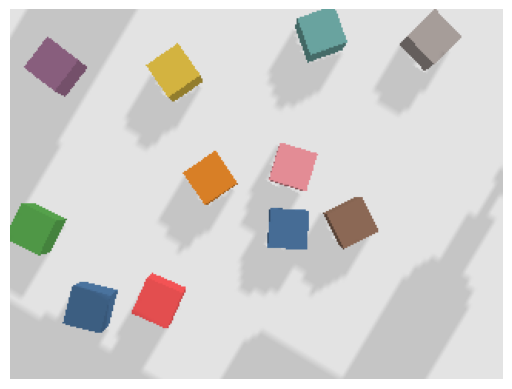

BadRequestError: Error code: 400 - {'error': {'message': 'Your input image may contain content that is not allowed by our safety system.', 'type': 'invalid_request_error', 'param': None, 'code': 'content_policy_violation'}}

In [7]:
agent = agent_factory("SegVLM")
run_experiment(env, agent, prompt)

In [10]:
agent = agent_factory("SegVLM")
plan_result = agent.plan(prompt, image)
plan_result

PlanResult(success=True,
 error_message=None,
 plan_raw="In the image, there are two red blocks that are highlighted and marked with numbers 30 and 12. You need to pick these items and place them in the green bowl which is marked with numbers 25, 37, 36, 6, 37, and 38. \n\nHere is a plan written in code to perform this task:\n\n```python\n# Pick the first red block and place it in the green bowl\npick(regions[30])\nplace(regions[25], orientation='any') # 'any' orientation since it's a bowl and exact orientation might not matter\n\n# Pick the second red block and place it in the green bowl\npick(regions[12])\nplace(regions[25], orientation='any')\n```\nMake sure to execute these steps sequentially to accomplish the task.",
 masks=[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       

In [4]:
agent = agent_factory("DetVLM")
plan_result = agent.plan(prompt, image)
plan_result

PlanResult(success=False,
 error_message='Invalid or no code is generated.',
 plan_raw='```python\n# Plan: Pick red block labeled as 1 and place it in the green bowl labeled as 3.\n\n# Picking up the red block (labeled as 1)\npick(regions[1])\n\n# Placing the red block inside the green bowl (labeled as 3) with no specific orientation mentioned\nplace(regions[3], orientation=None)\n```',
 masks=None,
 prompt='Task: Put the red blocks in the Green bowl.',
 plan_code=None,
 annotated_image=<PIL.Image.Image image mode=RGB size=1178x640 at 0x7FC63ADDA110>,
 info_dict={'configs': {'img_size': 640, 'label_mode': '1', 'alpha': 0.05}})

In [33]:
agent = agent_factory("DetLLM")
plan_result = agent.plan(prompt, image)
plan_result

PlanResult(success=True,
 error_message=None,
 plan_raw='```python\n# pick up the red block\npick(object="red block")\n\n# place it in the green bowl\nplace(object="green bowl", orientation="inside")\n```',
 masks=[],
 prompt='List of objects detected (coordinates are in (x1,y1), (x2, y2) order):\n- bowl (coordinates: (0.52, 0.42), (0.93, 0.92))\n- bowl (coordinates: (0.09, 0.14), (0.45, 0.53))\n\nTask: Put the red blocks in the Green bowl.',
 plan_code='\n# pick up the red block\npick(object="red block")\n\n# place it in the green bowl\nplace(object="green bowl", orientation="inside")\n',
 annotated_image=None,
 info_dict={'configs': {'img_size': 640, 'include_coordinates': True}, 'detected_objects': [{'score': 0.6390037536621094, 'bbox': [0.5232122540473938, 0.41973703487310554, 0.9289155602455139, 0.9216758092632518], 'box_name': 'bowl', 'objectness': 0.5611259341239929}, {'score': 0.6103522181510925, 'bbox': [0.08771899342536926, 0.13905499766115098, 0.45159217715263367, 0.52834221

In [ ]:
print(plan_result.plan_code)

In [ ]:
print(plan_result.plan_raw)

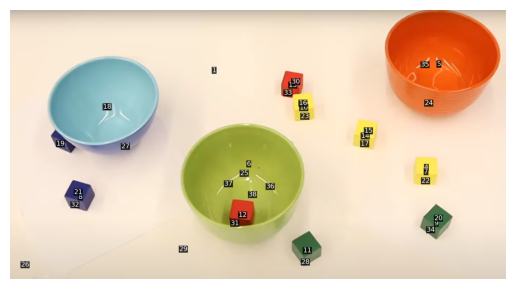

In [6]:
show_image(plan_result.annotated_image)